# One sample T-test

1. In One sample T-test determine whether the sample means statistically different from known or hypothesized population mean

In [5]:
from scipy.stats import ttest_1samp
import numpy as np
age = [20,25,30,31,23,45,32,43,32,23,24,19,28,24,30,30,23,22,20,20,20,20,21,20]
t,p_val=ttest_1samp(age,20) # 20 is known or hypothesized population mean
# ttest_1samp returns t value and p_value

print("T_val",t,"P_val",p_val)

if(p_val<0.05): # ttest_1samp is already returns pvalue from right so, we no need to calculate 1-p_val
    print("H0 rejected so, mean is not 20")
else:
    print("Failed to reject H0 so, mean is 20")

T_val 4.202342128279004 P_val 0.0003400445281994391
H0 rejected so, mean is not 20


# Two sample T-Test

1. checking that whether or not two population means are equal.

2. suppose we need to know mean weight of two turtle species are same or not . Since there are thousands of turtle in each population it will be time consuming for counting each turtle in each population.

3. Instead of that we take 15 simple random samples from each population and find mean of each.

4. virtually there will be different in each sample means, but we need to know that difference is **statistically significant enough** for saying each populations have different mean.

5. A two-sample t-test always uses the following null hypothesis:

    **H0: μ1 = μ2** (the two population means are equal)
    
    
    
    The alternative hypothesis can be either two-tailed, left-tailed, or right-tailed:

    **Ha (two-tailed): μ1 ≠ μ2** (the two population means are not equal)
    
    **Ha (left-tailed): μ1 < μ2** (population 1 mean is less than population 2 mean)
    
    **Ha (right-tailed): μ1> μ2** (population 1 mean is greater than population 2 mean)

In [19]:
from scipy.stats import ttest_ind
import numpy as np
data1=np.random.uniform(20,25.3,size=(20,))
data2=np.random.uniform(20.5,26.5,size=(20,))  # data1 and data2 are the two samples from two populations

t,p_val=ttest_ind(data1,data2)


print(p_val)
if(p_val<0.05): # ttest_ind is already returns pvalue from right so, we no need to calculate 1-p_val
    print("H0 rejected so, μ1 ≠ μ2")
else:
    print("Failed to reject H0 so, μ1 = μ2")
    



0.03794210142419935
H0 rejected so, μ1 ≠ μ2


# Paired sampled t-test

1. Paired sampled t-test :- The paired sample t-test is also called dependent sample t-test. It’s an univariate test that tests for a significant difference between 2 related variables

In [25]:
import pandas as pd
from scipy.stats import ttest_rel

data=pd.read_csv('blood_pressure.csv')

In [29]:
data.head()

,patient,sex,agegrp,bp_before,bp_after
0,1,Male,30-45,143,153
1,2,Male,30-45,163,170
2,3,Male,30-45,153,168
3,4,Male,30-45,153,142
4,5,Male,30-45,146,141


In [42]:
t_stats,p_val=ttest_rel(data.bp_before,data.bp_after)

print(p_val)
if(p_val<0.05): # Paired sampled t-test is already returns pvalue from right so, we no need to calculate 1-p_val
    print("H0 rejected so,  there is significant difference in BP before treatment and after treatment")
else:
    print("Failed to reject H0 so, there is No significant difference in BP before treatment and after treatment")

0.0011297914644840823
H0 rejected so,  there is significant difference in BP before treatment and after treatment


# One Sample Z Test

In [53]:
# same as One sample t test

from statsmodels.stats import weightstats

Ztest,p_val=weightstats.ztest(data.bp_before,value=159) # same as one sample t test.

# 159 is known or hypothesized population mean

print("P_val",p_val)

if(p_val<0.05): # its is already returns pvalue from right so, we no need to calculate 1-p_val
    print("H0 rejected so, mean is not 159")
else:
    print("Failed to reject H0 so, mean is 159")


P_val 0.014185854025524306
H0 rejected so, mean is not 159


# 2 Sample Z Test

In [58]:
Ztest,p_val=weightstats.ztest(data.bp_before,data.bp_after) # alternative 2 sided test

# H0: mue1=mue2
# Ha: mue1!=mue2

print(p_val)
if(p_val<0.05): # it is already returns pvalue from right so, we no need to calculate 1-p_val
    print("H0 rejected so,  there is significant difference in BP before treatment and after treatment")
else:
    print("Failed to reject H0 so, there is No significant difference in BP before treatment and after treatment")

0.002162306611369422
H0 rejected so,  there is significant difference in BP before treatment and after treatment


In [68]:
Ztest,p_val=weightstats.ztest(data.bp_before,data.bp_after,alternative='larger') # right tailed

# H0: mue1<=mue2
# Ha: mue1>mue2

print(p_val)
if(p_val<0.05): # it is already returns pvalue from right so, we no need to calculate 1-p_val
    print("H0 rejected so, bp before treatment is greater than bp after treatment, so bp reduced after treatment ")
else:
    print("Failed to reject H0 so, mue1<=mue2")

0.001081153305684711
H0 rejected so, bp before treatment is greater than bp after treatment, so bp reduced after treatment 


In [72]:
Ztest,p_val=weightstats.ztest(data.bp_before,data.bp_after,alternative='smaller') # left tailed

# H0: mue1>=mue2
# Ha: mue1<mue2

print(p_val)
if(p_val<0.05): # it is already returns pvalue from right so, we no need to calculate 1-p_val
    print("H0 rejected so, mue1<mue2 ")
else:
    print("Failed to reject H0 so, mue1>=mue2")

0.9989188466943153
Failed to reject H0 so, mue1>=mue2


# One-way anova

In [82]:
df1=pd.read_csv('PlantGrowth.csv')
df1=df1[['weight','group']]
grps=df1.group.unique()

In [84]:
df1.head()

,weight,group
0,4.17,ctrl
1,5.58,ctrl
2,5.18,ctrl
3,6.11,ctrl
4,4.50,ctrl


In [92]:
data={grp:df1.weight[df1.group==grp] for grp in grps}

In [96]:
from scipy.stats import f_oneway

f_stats,p_val=f_oneway(data['ctrl'], data['trt1'], data['trt2'])

print(p_val)
if(p_val<0.05): # it is already returns pvalue from right so, we no need to calculate 1-p_val
    print("H0 rejected so,  there is significancy in groups for weights")
else:
    print("Failed to reject H0 so, there is NO significancy in groups for weights")

0.0159099583256229
H0 rejected so,  there is significancy in groups for weights


# Two way anova

In [108]:
#create data
df = pd.DataFrame({'water': np.repeat(['daily', 'weekly'], 15),
                   'sun': np.tile(np.repeat(['low', 'med', 'high'], 5), 2),
                   'height': [6, 6, 6, 5, 6, 5, 5, 6, 4, 5,
                              6, 6, 7, 8, 7, 3, 4, 4, 4, 5,
                              4, 4, 4, 4, 4, 5, 6, 6, 7, 8]})

In [112]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

#perform two-way ANOVA
model = ols('height ~ C(water) + C(sun) + C(water) and C(sun)', data=df).fit() # (effect of water+ effect of sun + effect of water and sun in together) on height
result=sm.stats.anova_lm(model, typ=2)
result

,sum_sq,df,F,PR(>F)
C(water),8.533333,1.0,14.532751,0.000762
C(sun),24.866667,2.0,21.174672,0.000003
C(water)and C(sun),24.866667,2.0,21.174672,0.000003
Residual,15.266667,26.0,NaN,NaN


In [144]:
result.index.name='features'


In [150]:
result.reset_index(inplace=True)

In [207]:
import math
for i,j in enumerate(result['PR(>F)']):
    if not (math.isnan(float(j))):
        if j<0.05 :
            print(result.iloc[i]['features'],'Has effect on plant growth')
        else:
            print(result.iloc[i]['features'],'Has No effect on plant growth')

C(water) Has effect on plant growth
C(sun) Has effect on plant growth
C(water)and C(sun) Has effect on plant growth


# Chi-Square (Categorical Attributes)

In [215]:
df = pd.read_csv('data/Loan Prediction Dataset.csv')
df = df[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Status']]
# fill null values
for col in df.columns:
    df[col] = df[col].fillna(df[col].mode()[0])
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y
4,Male,No,0,Graduate,No,1.0,Urban,Y


In [218]:
# label encoding
from sklearn.preprocessing import LabelEncoder
for col in df.columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,1,2,1
1,1,1,1,0,0,1,0,0
2,1,1,0,0,1,1,2,1
3,1,1,0,1,0,1,2,1
4,1,0,0,0,0,1,2,1


In [221]:
from sklearn.feature_selection import chi2
X = df.drop(columns=['Loan_Status'], axis=1)
y = df['Loan_Status']

In [224]:
chi_scores = chi2(X, y)

In [227]:
chi_scores

(array([3.62343084e-02, 1.78242499e+00, 8.59527587e-02, 3.54050246e+00,
        7.28480330e-03, 2.60058772e+01, 3.77837464e-01]),
 array([8.49032435e-01, 1.81851834e-01, 7.69386856e-01, 5.98873168e-02,
        9.31982300e-01, 3.40379591e-07, 5.38762867e-01]))

<Axes: >

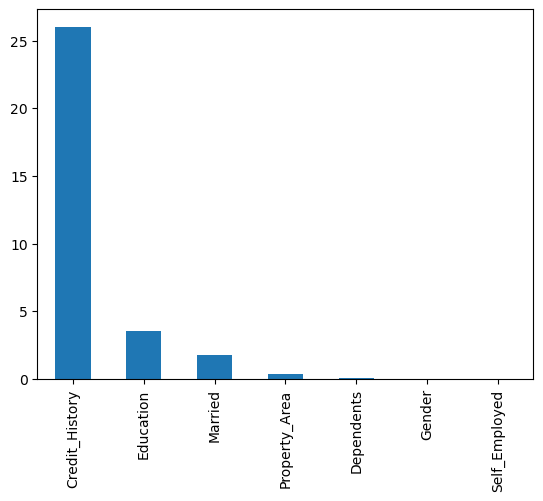

In [230]:
# higher the chi value, higher the importance
chi_values = pd.Series(chi_scores[0], index=X.columns)
chi_values.sort_values(ascending=False, inplace=True)
chi_values.plot.bar()